In [2]:
# ============================
# Baseline Modeling Pipeline
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Load dataset
df = pd.read_csv("data/wdi_hdr.csv")

# 2️⃣ Create target variable (Net migration per 1000)
df['Net migration per 1000'] = df['Net migration'] / (df['Population, total'] / 1000)

# 3️⃣ Define features (exclude identifiers + raw Net migration)
features = df.drop(columns=[
    "ISO3", "Country_Name", "Year", "Net migration", "Net migration per 1000"
])
target = df["Net migration per 1000"]

# 4️⃣ Train-test split (time-based, not random)
train = df[df["Year"] <= 2015]
test = df[df["Year"] > 2015]

X_train = train.drop(columns=["ISO3", "Country_Name", "Year", "Net migration", "Net migration per 1000"])
y_train = train["Net migration per 1000"]

X_test = test.drop(columns=["ISO3", "Country_Name", "Year", "Net migration", "Net migration per 1000"])
y_test = test["Net migration per 1000"]

# 5️⃣ Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

# 7️⃣ Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

# 8️⃣ Display results
results_df = pd.DataFrame(results).T
print("\nBaseline Model Performance (2016–2023 test set):")
print(results_df)


Baseline Model Performance (2016–2023 test set):
                        MAE      RMSE        R²
Linear Regression  4.793257  7.914650  0.340107
Ridge Regression   4.791671  7.913217  0.340346
Random Forest      3.747293  9.341681  0.080693


/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_26917/2837180313.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


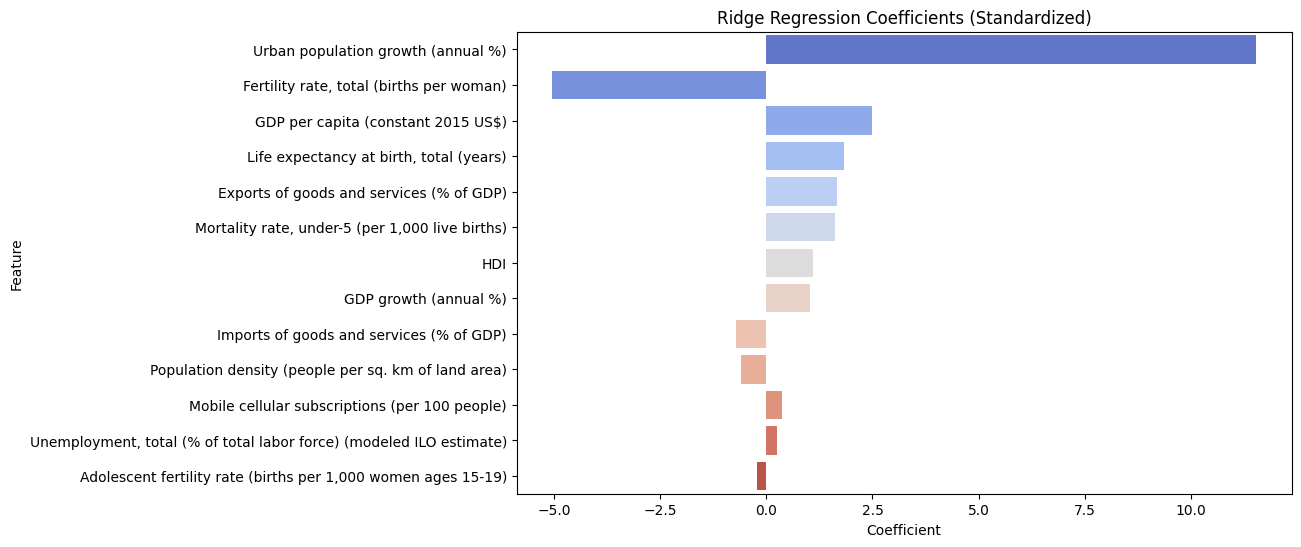

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_26917/2837180313.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance, x="Importance", y="Feature", palette="viridis")


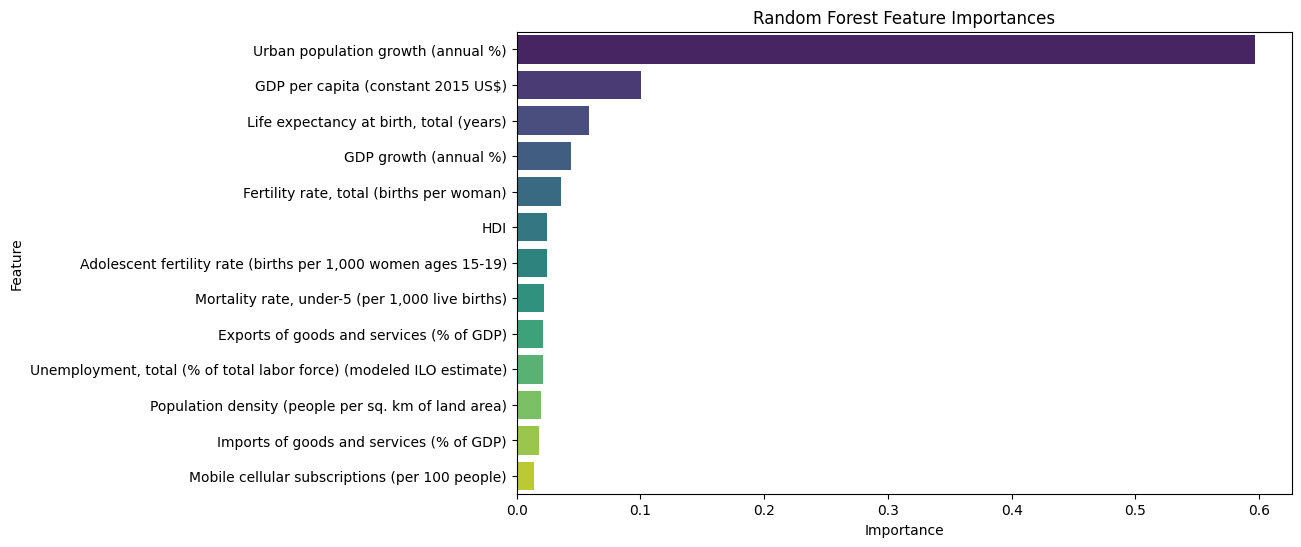

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1. Define features and target
# =====================
drop_cols = ["ISO3", "Country_Name", "Year", 
             "Net migration", "Net migration per 1000", "Population, total"]

X = df.drop(columns=drop_cols, errors="ignore")
y = df["Net migration per 1000"]

# Keep only numeric predictors
X = X.select_dtypes(include=["float64", "int64"])

# =====================
# 2. Standardize features
# =====================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =====================
# 3. Ridge Regression Coefficients
# =====================
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_scaled, y)

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Ridge Regression Coefficients (Standardized)")
plt.show()

# =====================
# 4. Random Forest Feature Importances
# =====================
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=rf_importance, x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importances")
plt.show()


🔎 Top 10 Features Comparison (Ridge vs Random Forest):
                                              Feature  Ridge_Coefficient  \
11                 Urban population growth (annual %)          11.550987   
4                  GDP per capita (constant 2015 US$)           2.483573   
7             Life expectancy at birth, total (years)           1.840926   
3                               GDP growth (annual %)           1.023204   
2            Fertility rate, total (births per woman)          -5.056509   
5                                                 HDI           1.095388   
0   Adolescent fertility rate (births per 1,000 wo...           0.000000   
8     Mortality rate, under-5 (per 1,000 live births)           1.614578   
1            Exports of goods and services (% of GDP)           1.665359   
10  Unemployment, total (% of total labor force) (...           0.000000   
9   Population density (people per sq. km of land ...          -0.591400   
6            Imports of goods an

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_26917/2335091030.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ridge, x="Ridge_Coefficient", y="Feature",
/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_26917/2335091030.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rf, x="RF_Importance", y="Feature",


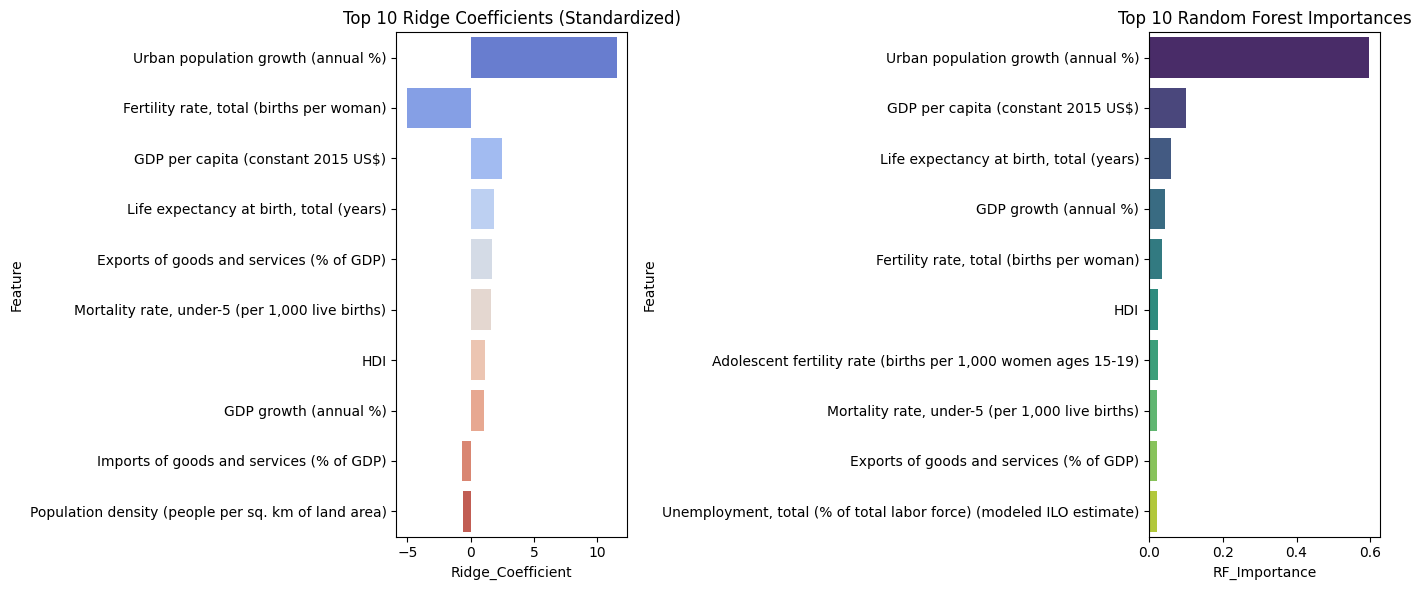

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1. Define features and target
# =====================
drop_cols = ["ISO3", "Country_Name", "Year", 
             "Net migration", "Net migration per 1000", "Population, total"]

X = df.drop(columns=drop_cols, errors="ignore")
y = df["Net migration per 1000"]

# Keep only numeric predictors
X = X.select_dtypes(include=["float64", "int64"])

# =====================
# 2. Standardize features for Ridge
# =====================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =====================
# 3. Ridge Regression Coefficients
# =====================
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_scaled, y)

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Ridge_Coefficient": ridge.coef_
}).sort_values(by="Ridge_Coefficient", key=abs, ascending=False)

# =====================
# 4. Random Forest Feature Importances
# =====================
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "RF_Importance": rf.feature_importances_
}).sort_values(by="RF_Importance", ascending=False)

# =====================
# 5. Merge Top 10 from Both
# =====================
top_ridge = coef_df.head(10)
top_rf = rf_importance.head(10)

comparison = pd.merge(top_ridge, top_rf, on="Feature", how="outer") \
               .fillna(0) \
               .sort_values(by=["RF_Importance", "Ridge_Coefficient"], 
                            ascending=[False, False])

print("\n🔎 Top 10 Features Comparison (Ridge vs Random Forest):")
print(comparison)

# =====================
# 6. Plot side-by-side barplots
# =====================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=top_ridge, x="Ridge_Coefficient", y="Feature", 
            palette="coolwarm", ax=axes[0])
axes[0].set_title("Top 10 Ridge Coefficients (Standardized)")

sns.barplot(data=top_rf, x="RF_Importance", y="Feature", 
            palette="viridis", ax=axes[1])
axes[1].set_title("Top 10 Random Forest Importances")

plt.tight_layout()
plt.show()


Gradient Boosting Performance (2016–2023 test set):
MAE: 3.837, RMSE: 7.301, R²: 0.438
SHAP values shape: (1344, 14)
Aligned feature names: ['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Exports of goods and services (% of GDP)', 'Fertility rate, total (births per woman)', 'GDP growth (annual %)', 'GDP per capita (constant 2015 US$)', 'Imports of goods and services (% of GDP)', 'Life expectancy at birth, total (years)', 'Mobile cellular subscriptions (per 100 people)', 'Mortality rate, under-5 (per 1,000 live births)', 'Population density (people per sq. km of land area)', 'Population, total', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Urban population growth (annual %)', 'HDI']


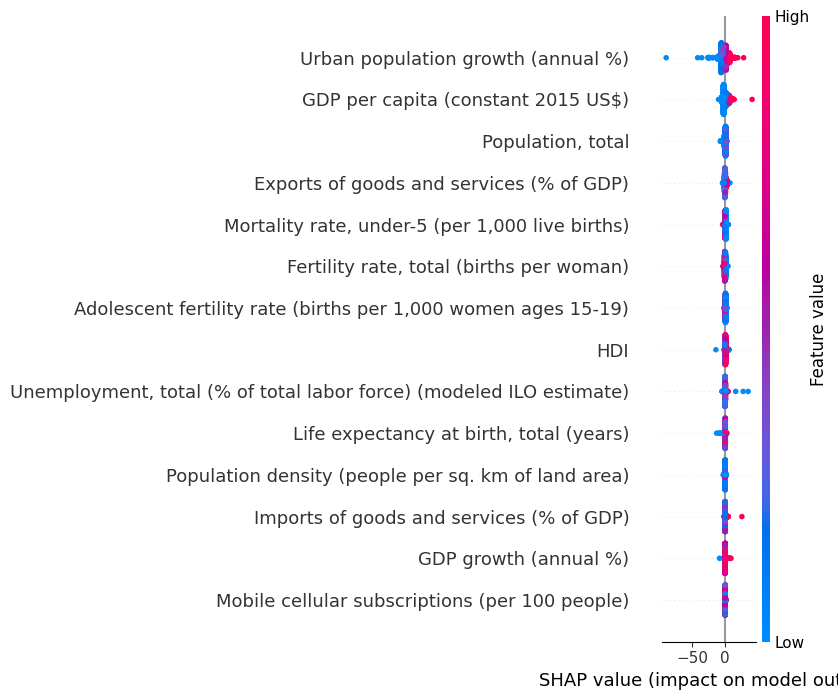

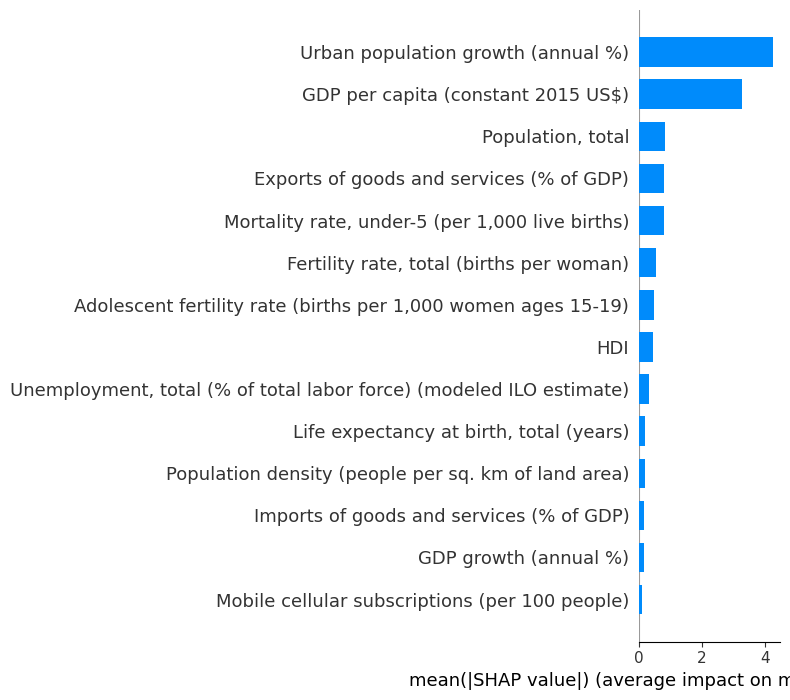


Top 10 SHAP Features:
                                              Feature  Mean |SHAP|
12                 Urban population growth (annual %)     4.266919
4                  GDP per capita (constant 2015 US$)     3.266047
10                                  Population, total     0.839070
1            Exports of goods and services (% of GDP)     0.804271
8     Mortality rate, under-5 (per 1,000 live births)     0.783698
2            Fertility rate, total (births per woman)     0.537537
0   Adolescent fertility rate (births per 1,000 wo...     0.488529
13                                                HDI     0.437587
11  Unemployment, total (% of total labor force) (...     0.310512
6             Life expectancy at birth, total (years)     0.196928


In [11]:
# =====================
# Gradient Boosting + SHAP (Fixed Alignment)
# =====================

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import numpy as np
import pandas as pd

# Train model
gbr = GradientBoostingRegressor(random_state=42, n_estimators=300, learning_rate=0.05, max_depth=3)
gbr.fit(X_train, y_train)

# Evaluate
y_pred_gbr = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Performance (2016–2023 test set):")
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

# SHAP
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)

# ✅ Ensure correct shape
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Align feature names with shap_values shape
n_features = shap_values.shape[1]
feature_names = X_test.columns[:n_features]

print("SHAP values shape:", shap_values.shape)
print("Aligned feature names:", list(feature_names))

# Plot
shap.summary_plot(shap_values, X_test.iloc[:, :n_features], feature_names=feature_names)
shap.summary_plot(shap_values, X_test.iloc[:, :n_features], plot_type="bar", feature_names=feature_names)

# Optional: Tabular top features
shap_importance = pd.DataFrame({
    "Feature": feature_names,
    "Mean |SHAP|": np.abs(shap_values).mean(axis=0)
}).sort_values("Mean |SHAP|", ascending=False)

print("\nTop 10 SHAP Features:")
print(shap_importance.head(10))

✅ Features plotted: ['Urban population growth (annual %)', 'GDP per capita (constant 2015 US$)', 'Exports of goods and services (% of GDP)', 'Mortality rate, under-5 (per 1,000 live births)', 'Fertility rate, total (births per woman)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'HDI', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Life expectancy at birth, total (years)']


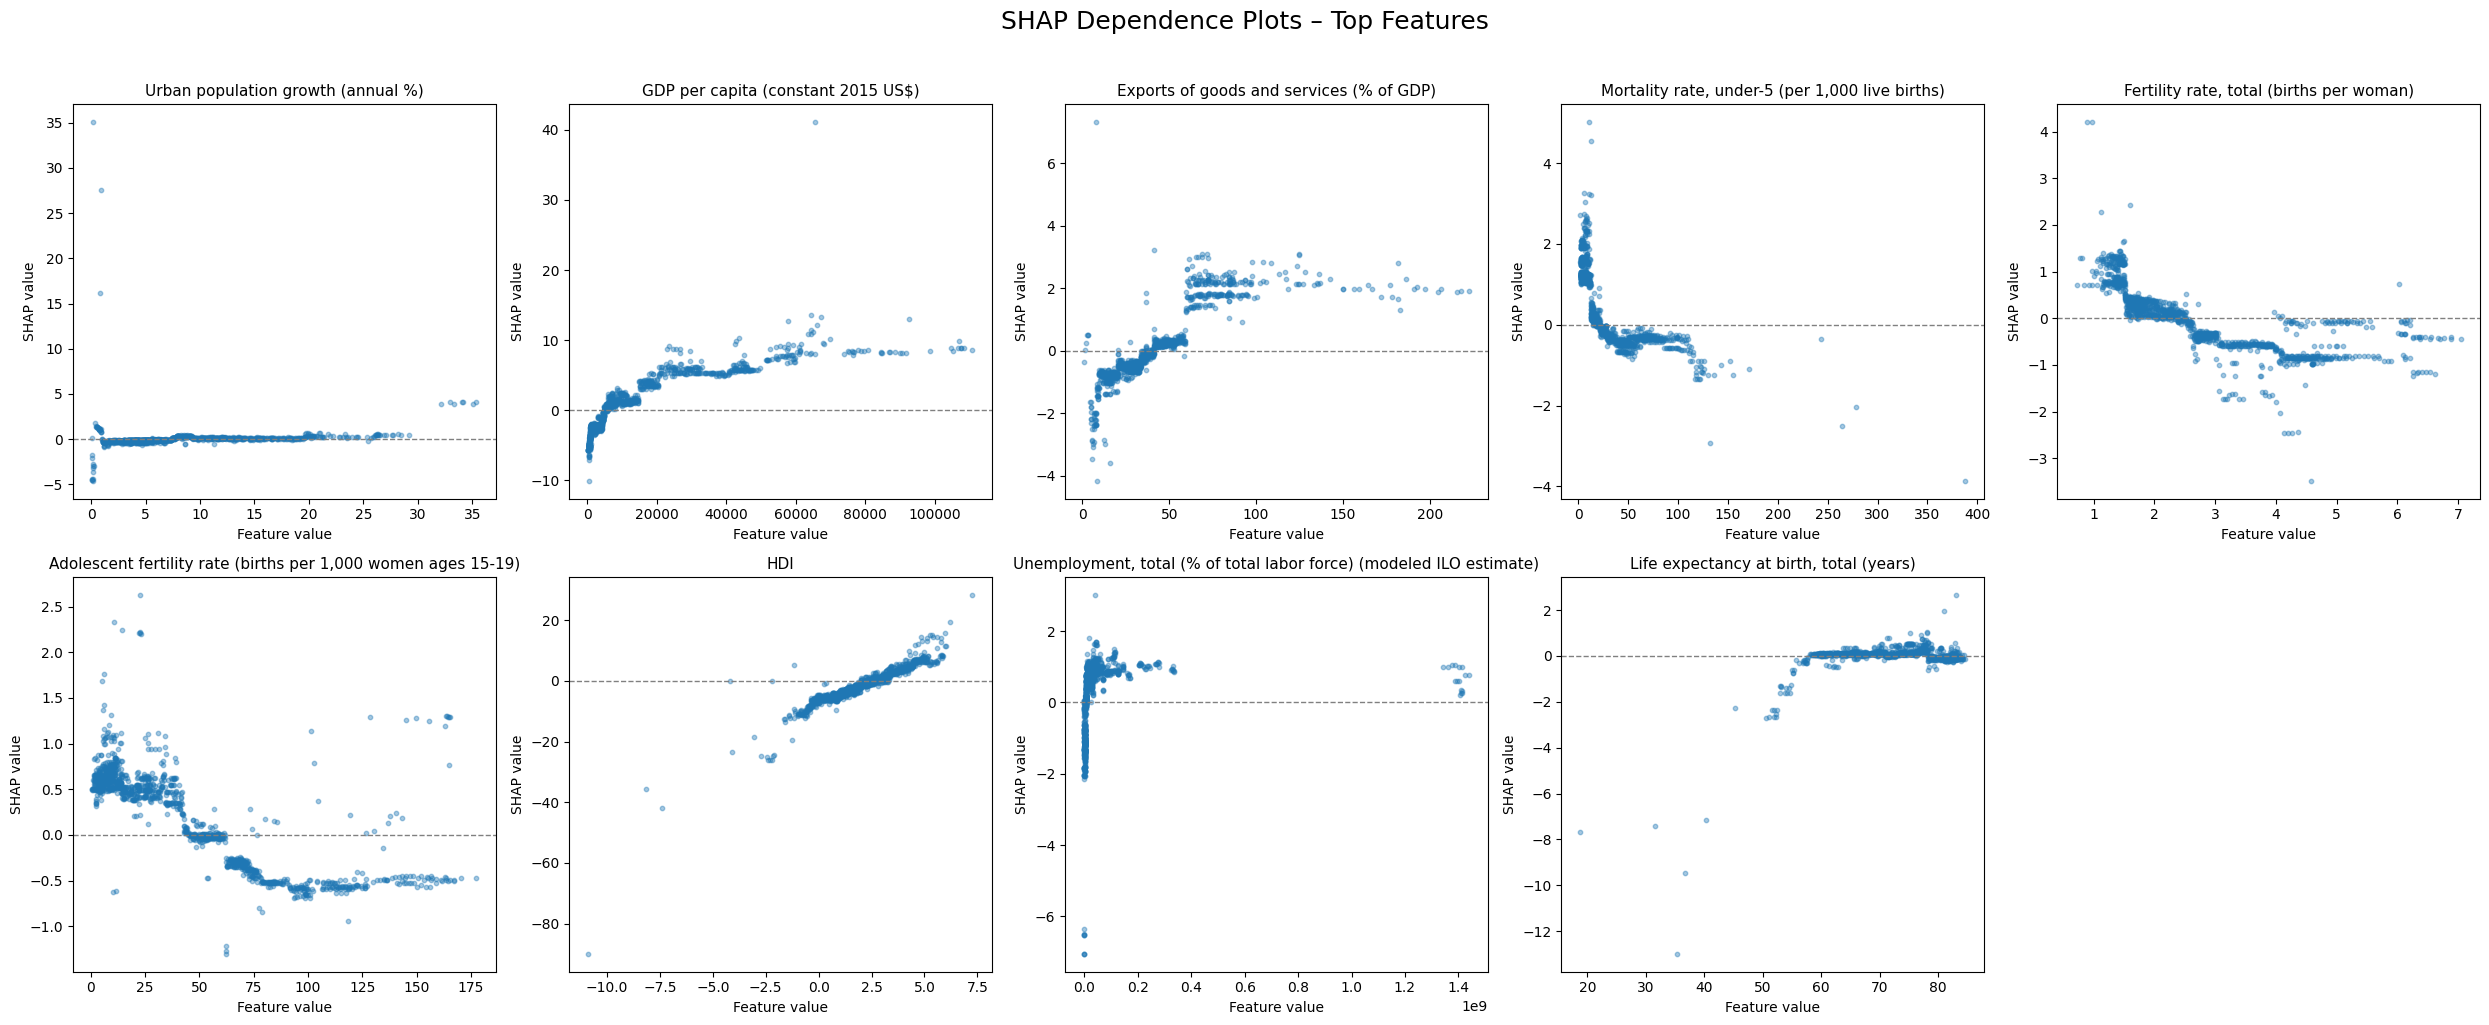

In [20]:
# =====================
# Custom SHAP Dependence Plots (Top 10 Features in Grid)
# =====================

import matplotlib.pyplot as plt

# Convert shap_values to numpy if needed
shap_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Ensure features align with X_test columns
valid_features = [f for f in shap_importance["Feature"].head(10) if f in X.columns]
feature_to_index = {col: idx for idx, col in enumerate(X.columns)}

print("✅ Features plotted:", valid_features)

# Create a grid dynamically
n = len(valid_features)
rows = (n + 4) // 5  # 5 plots per row
fig, axes = plt.subplots(rows, 5, figsize=(25, 5*rows))
axes = axes.flatten()

for i, feature in enumerate(valid_features):
    ax = axes[i]

    idx = feature_to_index[feature]
    shap_vals = shap_array[:, idx]
    feature_vals = X_test.iloc[:, idx]

    ax.scatter(feature_vals, shap_vals, alpha=0.4, s=10)
    ax.axhline(0, color="gray", linestyle="--", linewidth=1)
    ax.set_title(feature, fontsize=11)
    ax.set_xlabel("Feature value")
    ax.set_ylabel("SHAP value")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("SHAP Dependence Plots – Top Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

Raw SHAP shape: (1344, 14)
Fixed SHAP shape: (1344, 13)


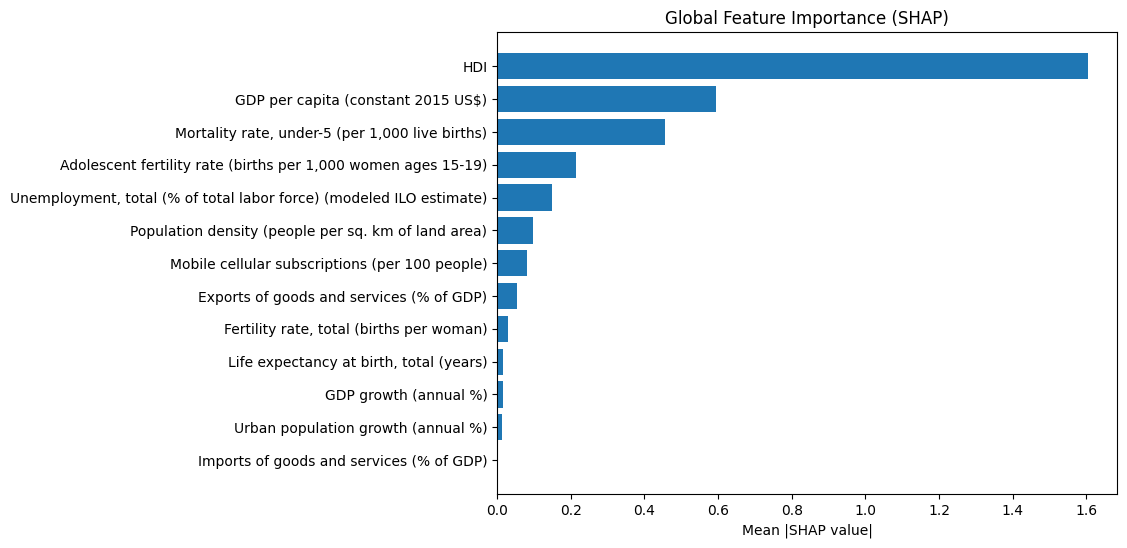

,Feature,Mean_SHAP,Mean_Abs_SHAP
12,HDI,-1.603032,1.603032
4,GDP per capita (constant 2015 US$),0.593548,0.593548
8,"Mortality rate, under-5 (per 1,000 live births)",0.454986,0.454986
0,"Adolescent fertility rate (births per 1,000 wo...",0.213575,0.213575
10,"Unemployment, total (% of total labor force) (...",0.148717,0.148717
9,Population density (people per sq. km of land ...,-0.096842,0.096842
7,Mobile cellular subscriptions (per 100 people),0.080362,0.080362
1,Exports of goods and services (% of GDP),0.054730,0.054730
2,"Fertility rate, total (births per woman)",0.030535,0.030535
6,"Life expectancy at birth, total (years)",0.017315,0.017315


In [26]:
import pandas as pd
import numpy as np

# SHAP array
shap_array = shap_values  # already numpy
print("Raw SHAP shape:", shap_array.shape)

# Drop the bias column if present
if shap_array.shape[1] == len(X.columns) + 1:
    shap_array = shap_array[:, :-1]  # remove last column
    print("Fixed SHAP shape:", shap_array.shape)

# Compute mean SHAP values per feature
shap_means = shap_array.mean(axis=0)

# Build DataFrame aligned with X.columns
shap_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP": shap_means,
    "Mean_Abs_SHAP": np.abs(shap_means)
})

# Sort by absolute SHAP importance
shap_df = shap_df.sort_values("Mean_Abs_SHAP", ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(shap_df["Feature"], shap_df["Mean_Abs_SHAP"])
plt.xlabel("Mean |SHAP value|")
plt.title("Global Feature Importance (SHAP)")
plt.show()

display(shap_df.sort_values("Mean_Abs_SHAP", ascending=False).head(10))

<Figure size 1000x700 with 0 Axes>

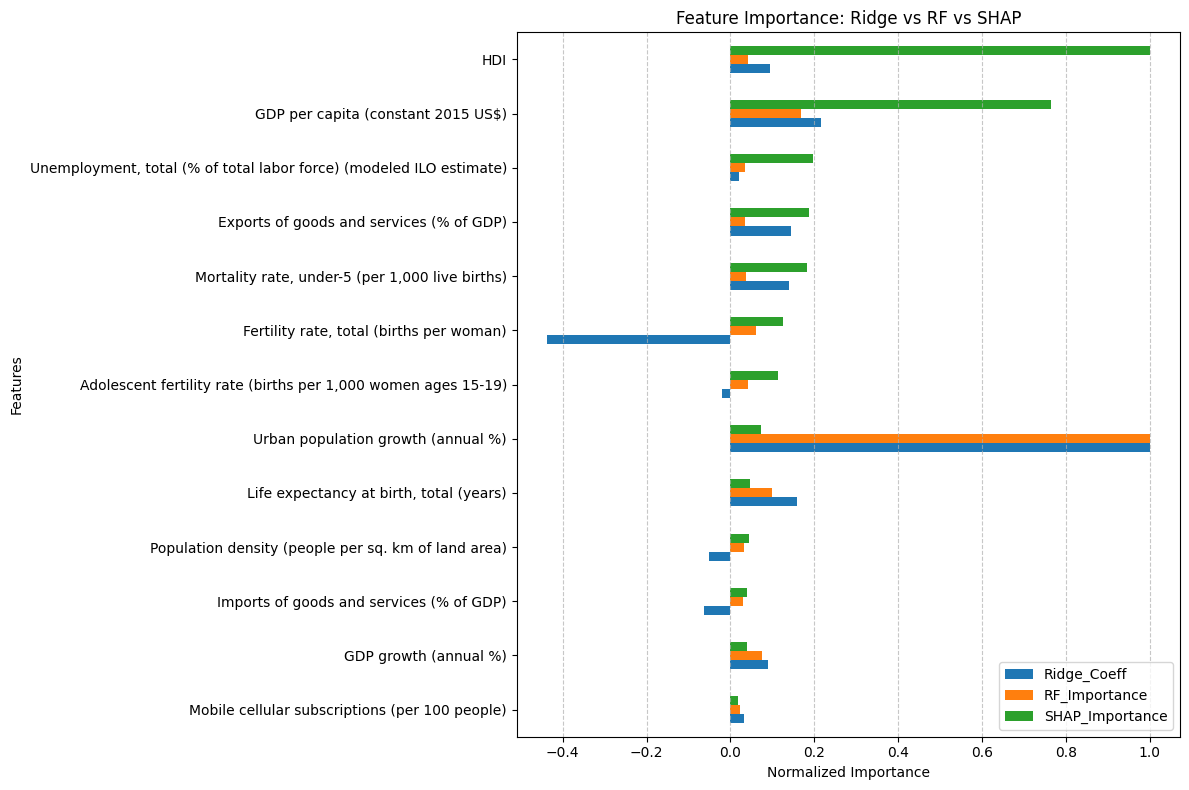

In [27]:
# =====================
# Combined Feature Importance Plot
# =====================

import matplotlib.pyplot as plt

# --- Ridge coefficients (already trained earlier) ---
ridge_importance = pd.Series(ridge.coef_, index=X.columns)

# --- Random Forest importance ---
rf_importance = pd.Series(rf.feature_importances_, index=X.columns)

# --- SHAP importance ---
shap_importance = pd.Series(np.abs(shap_array).mean(axis=0), index=X.columns)

# --- Combine into one DataFrame ---
importance_df = pd.DataFrame({
    "Ridge_Coeff": ridge_importance,
    "RF_Importance": rf_importance,
    "SHAP_Importance": shap_importance
})

# Normalize for fair comparison
importance_df = importance_df / importance_df.abs().max()

# Sort by SHAP importance (most interpretable)
importance_df = importance_df.sort_values("SHAP_Importance", ascending=True)

# --- Plot ---
plt.figure(figsize=(10, 7))
importance_df.plot(kind="barh", figsize=(12, 8))
plt.title("Feature Importance: Ridge vs RF vs SHAP")
plt.xlabel("Normalized Importance")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [28]:
# Save comparison table
importance_df.to_csv("data/feature_importance_comparison.csv", index=True)
print("✅ Feature importance table saved to data/feature_importance_comparison.csv")

✅ Feature importance table saved to data/feature_importance_comparison.csv


In [32]:
# =====================
# Ridge Coefficients (fixed)
# =====================

from sklearn.linear_model import Ridge

# Refit Ridge without scaling for interpretability
ridge_raw = Ridge(alpha=1.0, random_state=42)
ridge_raw.fit(X_train, y_train)

# Coefficients should match feature count
ridge_coef_raw = pd.Series(ridge_raw.coef_[:len(X.columns)], index=X.columns)

# Save to CSV
ridge_coef_raw.to_csv("data/ridge_coefficients_raw.csv")

print("Intercept:", ridge_raw.intercept_)
print("\nTop Ridge coefficients (raw features):")
print(ridge_coef_raw.sort_values(key=abs, ascending=False).head(10))

Intercept: -23.718342298446498

Top Ridge coefficients (raw features):
HDI                                                              5.397636
Fertility rate, total (births per woman)                        -3.490442
Life expectancy at birth, total (years)                          0.275066
GDP growth (annual %)                                            0.161044
Urban population growth (annual %)                               0.057949
Exports of goods and services (% of GDP)                         0.052284
Mortality rate, under-5 (per 1,000 live births)                  0.034731
Imports of goods and services (% of GDP)                        -0.028531
Mobile cellular subscriptions (per 100 people)                   0.008294
Adolescent fertility rate (births per 1,000 women ages 15-19)   -0.002971
dtype: float64


/Users/golibsanaev/Projects/Forecasting_Migration_Flows_with_ML/.venv/lib/python3.13/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.73981e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [34]:
# =====================
# Compare Ridge Coefficients vs SHAP Importances
# =====================

# --- Ridge coefficients (trim to match feature count) ---
ridge_coef = pd.Series(ridge_raw.coef_[:len(X.columns)], index=X.columns)

ridge_df = ridge_coef.reset_index()
ridge_df.columns = ["Feature", "Ridge_Coefficient"]

# --- SHAP mean absolute values ---
shap_means = shap_values.mean(axis=0)   # mean SHAP values per feature
shap_abs_means = np.abs(shap_values).mean(axis=0)

# Ensure same length as X
shap_means = shap_means[:len(X.columns)]
shap_abs_means = shap_abs_means[:len(X.columns)]

shap_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP": shap_means,
    "Mean_Abs_SHAP": shap_abs_means
})

# --- Merge for comparison ---
comparison = ridge_df.merge(shap_df, on="Feature")

# --- Sort by SHAP importance ---
comparison = comparison.sort_values("Mean_Abs_SHAP", ascending=False)

# Display
print("\n🔎 Top Features: Ridge vs SHAP")
display(comparison)

# Optional: save to CSV
comparison.to_csv("data/ridge_vs_shap.csv", index=False)


🔎 Top Features: Ridge vs SHAP


,Feature,Ridge_Coefficient,Mean_SHAP,Mean_Abs_SHAP
12,HDI,5.397636e+00,-1.603032,4.266919
4,GDP per capita (constant 2015 US$),1.920921e-04,0.593548,3.266047
10,"Unemployment, total (% of total labor force) (...",-6.357786e-09,0.148717,0.839070
1,Exports of goods and services (% of GDP),5.228372e-02,0.054730,0.804271
8,"Mortality rate, under-5 (per 1,000 live births)",3.473084e-02,0.454986,0.783698
2,"Fertility rate, total (births per woman)",-3.490442e+00,0.030535,0.537537
0,"Adolescent fertility rate (births per 1,000 wo...",-2.970851e-03,0.213575,0.488529
11,Urban population growth (annual %),5.794884e-02,0.012112,0.310512
6,"Life expectancy at birth, total (years)",2.750661e-01,0.017315,0.196928
9,Population density (people per sq. km of land ...,-6.049551e-04,-0.096842,0.184026


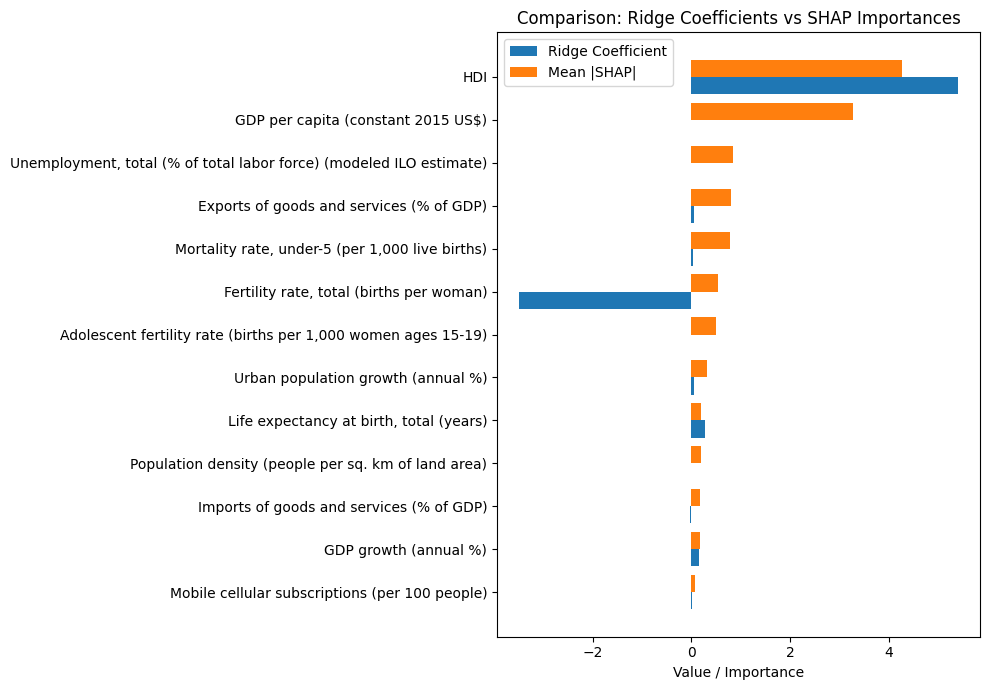

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Sort by SHAP importance (absolute)
shap_sorted = shap_df.sort_values("Mean_Abs_SHAP", ascending=True)

# Align Ridge with SHAP ordering
ridge_aligned = ridge_coef.loc[shap_sorted["Feature"]]

# Plot
plt.figure(figsize=(10, 7))

y = np.arange(len(shap_sorted))
plt.barh(y - 0.2, ridge_aligned.values, height=0.4, label="Ridge Coefficient")
plt.barh(y + 0.2, shap_sorted["Mean_Abs_SHAP"].values, height=0.4, label="Mean |SHAP|")

plt.yticks(y, shap_sorted["Feature"])
plt.xlabel("Value / Importance")
plt.title("Comparison: Ridge Coefficients vs SHAP Importances")
plt.legend()
plt.tight_layout()
plt.show()

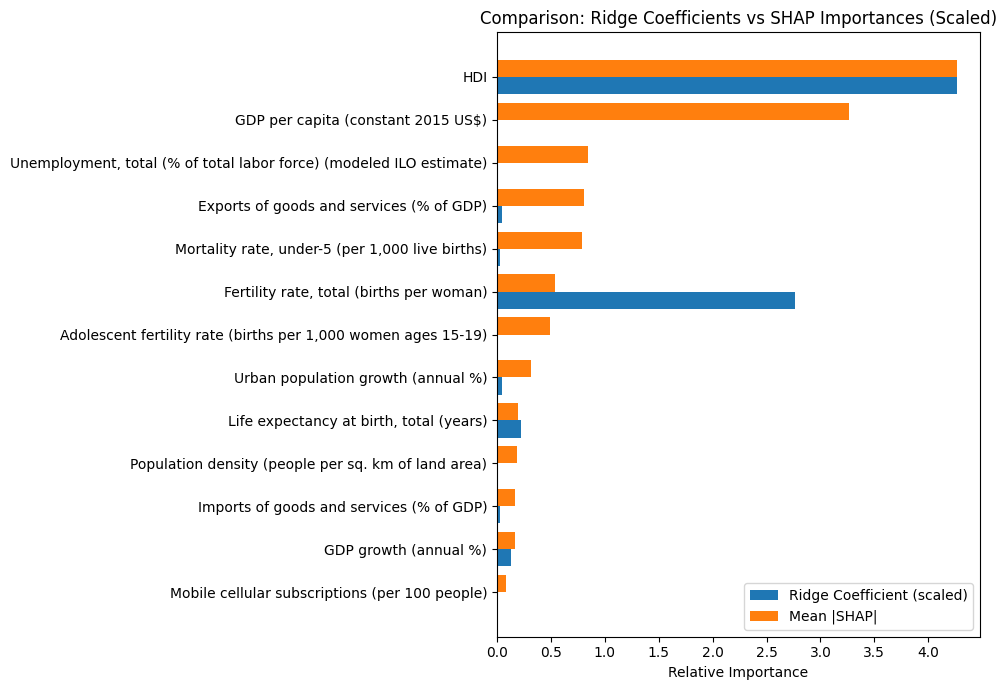

In [36]:
# Scale Ridge coefficients to be comparable with SHAP
ridge_scaled = np.abs(ridge_aligned.values)
ridge_scaled = ridge_scaled / ridge_scaled.max() * shap_sorted["Mean_Abs_SHAP"].max()

plt.figure(figsize=(10, 7))

y = np.arange(len(shap_sorted))
plt.barh(y - 0.2, ridge_scaled, height=0.4, label="Ridge Coefficient (scaled)")
plt.barh(y + 0.2, shap_sorted["Mean_Abs_SHAP"].values, height=0.4, label="Mean |SHAP|")

plt.yticks(y, shap_sorted["Feature"])
plt.xlabel("Relative Importance")
plt.title("Comparison: Ridge Coefficients vs SHAP Importances (Scaled)")
plt.legend()
plt.tight_layout()
plt.show()